## Perceptron : AND / OR / XOR

In [74]:
import numpy as np

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [75]:
print('AND(0,0): {}'.format(AND(0,0)))
print('AND(0,1): {}'.format(AND(0,1)))
print('AND(1,0): {}'.format(AND(1,0)))
print('AND(1,1): {}'.format(AND(1,1)))

AND(0,0): 0
AND(0,1): 0
AND(1,0): 0
AND(1,1): 1


In [16]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.1
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [17]:
print('OR(0,0): {}'.format(OR(0,0)))
print('OR(0,1): {}'.format(OR(0,1)))
print('OR(1,0): {}'.format(OR(1,0)))
print('OR(1,1): {}'.format(OR(1,1)))

OR(0,0): 0
OR(0,1): 1
OR(1,0): 1
OR(1,1): 1


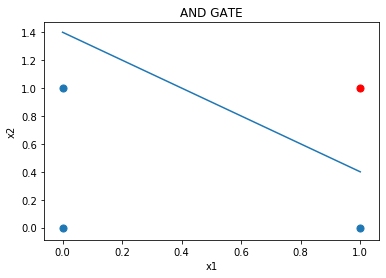

In [94]:
import matplotlib.pyplot as plt

FAND = lambda x : -x +(7./5.)
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0,0,1],[0,1,0], s=50)
plt.scatter([1],[1], c='red', s=50)
plt.plot(xs, [FAND(x) for x in xs])
plt.title('AND GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

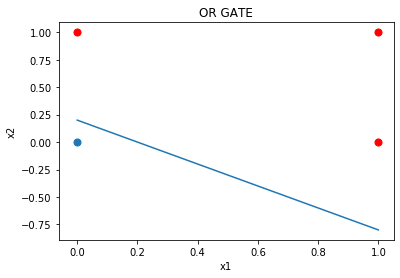

In [95]:
FOR = lambda x : -x + (1./5.)
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0],[0], s=50)
plt.scatter([0,1,1],[1,0,1], c='red', s=50)
plt.plot(xs, [FOR(x) for x in xs])
plt.title('OR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

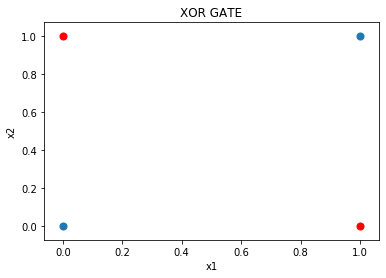

In [97]:
fig = plt.figure()
plt.scatter([0,1],[0,1], s=50)
plt.scatter([0,1],[1,0], c='red', s=50)
plt.title('XOR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [169]:
import torch

x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y = torch.FloatTensor([[0],[1],[1],[0]])

linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(step, cost.item())

0 0.7619683742523193
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [170]:
ws = linear.weight
bias = linear.bias
print(ws)
print(bias)

def XOR(x1, x2):
    tmp = ws[0][0]*x1 + ws[0][1]*x2
    if tmp <= bias[0]:
        return 0
    else:
        return 1

Parameter containing:
tensor([[1.1921e-07, 1.1921e-07]], requires_grad=True)
Parameter containing:
tensor([-1.7136e-07], requires_grad=True)


In [171]:
print('XOR(0,0): {}'.format(XOR(0,0)))
print('XOR(0,1): {}'.format(XOR(0,1)))
print('XOR(1,0): {}'.format(XOR(1,0)))
print('XOR(1,1): {}'.format(XOR(1,1)))

XOR(0,0): 1
XOR(0,1): 1
XOR(1,0): 1
XOR(1,1): 1


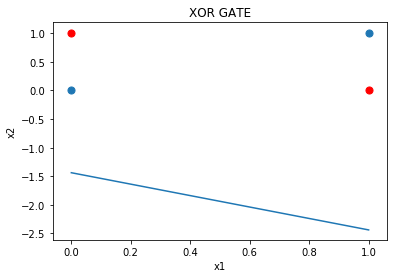

In [172]:
FXOR = lambda x : -(ws[0][0]/ws[0][1])*x + (bias/ws[0][1])
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0,1],[0,1], s=50)
plt.scatter([0,1],[1,0], c='red', s=50)
plt.plot(xs, [FXOR(x) for x in xs])
plt.title('XOR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Loss function

### MSE

In [173]:
def mean_squre_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [180]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.7])
mean_squre_error(y, t)

0.3325

In [181]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1])
mean_squre_error(y, t)

0.09250000000000003

### CEE

In [204]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [203]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.9])
cross_entropy_error(y, t)

0.510825457099338

In [201]:
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1])
cross_entropy_error(y, t)

0.510825457099338

In [202]:
y = np.array([0.1, 0.05, 0.01, 0, 0.05, 0.9])
cross_entropy_error(y, t)

4.605160186038091